<h1><center>Practice of Large Scale Machine Learning<center></h1>
  <h1><center>TP4.2 MNIST classification using a CNN<center></h1>
<h2><center>ATHENS 2018<center></h2>
  Email address for sending back the TPs: attilio.fiandrotti@telecom-paristech.fr

# Installing and importing Keras

In [0]:
# This shell command will install the keras package into our VM (if not already installed)
# Mind the "!" escape character at the beginning of the line
!pip install -q keras

In [2]:
# Importing the Keras main module: different backends will have different data ordering:
# theano backend: NCHW
# tensorflow backend: NHWC 
import keras

Using TensorFlow backend.


# Loading and preparing the MNIST dataset
Load the MNIST dataset made available by keras.datasets
Verify the amount of system memory available before and after loading the dataset.

In [0]:
#@title
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet)
from keras.datasets import mnist
# START CODE HERE
(x_train,y_train),(x_test,y_test)=mnist.load_data()
# END CODE HERE

Using the pyplot package, visualize the fist sample of the trainig set

Text(0.5,1,'Class 5')

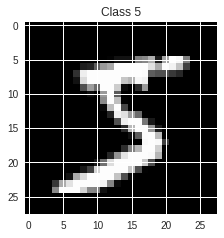

In [4]:
# Let us visualize the first training sample using the Gnuplot library
from matplotlib import pyplot as plt
# START CODE HERE
plt.figure(figsize=(12,12))

plt.subplot(3,3,1)
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title("Class {}".format(y_train[0]))
# END CODE HERE

Turn train and test labels to one-hot encoding

In [0]:
# Do you remember about one-hot encoding ?
from keras.utils.np_utils import to_categorical
# START CODE HERE
y_trainoh=to_categorical(y_train,10)
y_testoh= to_categorical(y_test,10)
# END CODE HERE



Reshape the train and test images to the correct 4-dimensional NHWC format using the reshape() method.
Then, normalize the images so that they have zero mean and standard deviation equal to 1 (also approximate solutions are acceptable)

In [0]:
# Reshape to proper images with 1 color channel according to backend scheme
img_rows, img_cols = 28, 28
# START CODE HERE
x_trl=x_train.shape[0]
x_tsl=x_test.shape[0]

x_train=x_train.reshape(x_trl,img_rows,img_cols,1)
x_test =x_test.reshape(x_tsl,img_rows,img_cols,1)
# END CODE HERE

# Now let us normalize the image in the [0-1] range
x_train=x_train.astype('float32')
x_test= x_test.astype('float32')

x_train/=255
x_test/=255

In [7]:
x_train.mean()

0.13066062

# Defining the neural network architecture (i.e., the network model)
Create a LeNet5-like convolutional neural network taking in input the images as matrices of pixels and suitable to classify each image across 10 different classes.
Then, instantiate a SGD optimizer with a tentative LR of 10^-3 and using the appropriate loss function and compile the model.
Calculate the coputational complexity of the convolutional layer(s) and of the first fully connected layer and compare it with that of the previous exercise.

In [8]:
# The Sequential module is sort of a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Convolution2D as Conv2D, MaxPooling2D

# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to teh computed error gradints
from keras import optimizers

input_shape = (img_rows, img_cols, 1)

# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (5, 5)
# Number of filters in first convolutional layer
num_kernel_first_conv_layer = 6
# Number of filters in second convolutional layer
num_kernel_second_conv_layer = 16

nb_classes = 10

# START CODE HERE
keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(6,kernel_size,input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Conv2D(16,kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

# END CODE HERE

# Defining our SGD optimizer

# START CODE HERE

sgd=optimizers.SGD(lr=1e-3)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
# END CODE HERE

# Let us have a look at the model topology
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
activation_2 (Activation)    (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
__________

# Training the network
Train the model for 10 epochs and over 10k training samples initially only using the fit() method, validating the model at each epoch and keeping track of the training history

In [9]:
# This is where the actual training-testing happens
# Dimension of the batch size (number of images over which error gradients are averaged)
batch_size = 100
# Number of epochs we want to train
epochs = 10
# START CODE HERE
history=model.fit(x_train,y_trainoh,epochs=10,batch_size=batch_size,verbose=1,validation_data=(x_test,y_testoh))
# END CODE HERE

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 114us/step - loss: 2.2892 - acc: 0.1319 - val_loss: 2.2536 - val_acc: 0.2441
Epoch 2/10
60000/60000 [==============================] - 5s 82us/step - loss: 2.1887 - acc: 0.4351 - val_loss: 2.0778 - val_acc: 0.5799
Epoch 3/10
60000/60000 [==============================] - 5s 83us/step - loss: 1.7832 - acc: 0.6416 - val_loss: 1.3207 - val_acc: 0.7287
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.9406 - acc: 0.7870 - val_loss: 0.6503 - val_acc: 0.8327
Epoch 5/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.5676 - acc: 0.8487 - val_loss: 0.4754 - val_acc: 0.8672
Epoch 6/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.4522 - acc: 0.8723 - val_loss: 0.4007 - val_acc: 0.8831
Epoch 7/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.3950 - acc: 0.8852 - val_loss: 0.3589 - val_ac

# Visualizing the network performance
Visualize the training history using the pyplot package: plot in one graph the train and vaidation loss functions, in another graph the train and validation accuracy

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


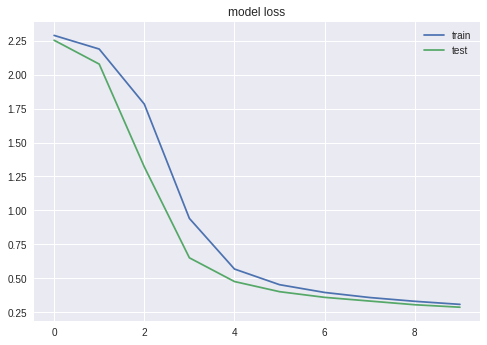

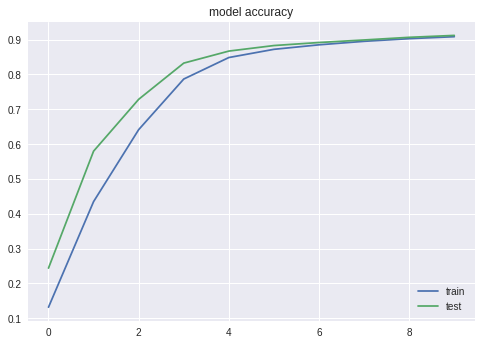

In [12]:
# We now want to plot the train and validation loss functions and accuracy curves

# summarize history for loss
print(history.history.keys())

# summarize history for loss
# START CODE HERE
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train','test'],loc='upper right')
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.legend(['train','test'],loc='lower right')
# END CODE HERE
plt.show()


# Experiments

Note down the performance of the trained network in terms of training and validation accuracy as a reference. Then, experiment as follow and compare performance with the reference scenario.

*   **Filter size**: experiment with square filters of different size and compare performance with reference scenario.
*   **Number of filters**: experiment increasing the number of filters in the first and second layer and find the maximum number of filters the network can tolerate before overfitting to the training samples.
* **Padding**: experiment withnarrow and wide convolutions: what changes in terms of featuremap size ?
*  **Pooling layers**: expeirment with different pooling layers (maxpooling and avgpooling): which one yield the best performance ?
What happens if the pooling layers are removed altogether in terms of comlexity-performance tradeoff ?
* **Pooling-less architectures**: Modify the network architecture to obtain a twofold reduction of each featuremap without resorting to pooling layers (hint: take insipiration from the ResNet architecture).
* **Confusion analysis**: Using the proper metric  from sklearn, check which character is most frequently confused with which: can you explain why ?





In [16]:
# Example of a confusion matrix using sklearn.metrics
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test)
# Mind that confusion_matrix requires
# START CODE HERE
cm=confusion_matrix(y_test,predictions.argmax(axis=1))
# END CODE HERE
print (cm)


[[ 946    0    3    0    4    7   12    2    6    0]
 [   0 1108    4    5    1    2    2    1   12    0]
 [   4    0  966    9    5    3   13   13   16    3]
 [   3    2   26  906    0   29    2   15   19    8]
 [   1    2    2    1  858    0   36    2    7   73]
 [  11    6   12   42   11  756   22    4   26    2]
 [  13    3    6    1   15   16  898    1    5    0]
 [   4   12   41    4    4    2    1  908    8   44]
 [  10    2    8   17   11   20   16   11  869   10]
 [   6    6    4    8   37    7    3   19   12  907]]


In [36]:
import numpy as np
cur=np.zeros(10)
for i in range(10):
  cur[i]=max(cm[i,:])/sum(cm[i,:])
print("The accuracy of the numbers is: \n",cur)
print("The most frequently confused character is",cur.argmin())


The accuracy of the numbers is: 
 [0.96530612 0.97621145 0.93604651 0.8970297  0.87372709 0.84753363
 0.93736952 0.88326848 0.89219713 0.89890981]
The most frequently confused character is 5
